# **Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Edutech**

- Nama: Indira Aline
- Email: indiradira63@gmail.com
- Id Dicoding: indira_kbs

# **Import library yang dibutuhkan**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
dataset = "https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/refs/heads/main/employee/employee_data.csv"
df = pd.read_csv(dataset)

# **Data Understanding**

Melihat 5 baris teratas dari dataset

In [3]:
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


Info dataset

In [4]:
dataset_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

Meninjau missing values pada setiap kolom

In [5]:
missing_values = df.isnull().sum()
missing_values

,0
EmployeeId,0
Age,0
Attrition,412
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0


Meninjau duplikasi pada dataset

In [6]:
duplicate_count = df.duplicated().sum()
print("Jumlah duplikasi: ", duplicate_count)

Jumlah duplikasi:  0


Insight:
*   Total baris: 1,470
*   Total kolom: 35
*   Fitur target Attrition memiliki 412 missing values.
*   Tipe data terdiri dari numerik (int64, float64) dan kategorikal (object).
*   0 duplikat data ditemukan

Univariate

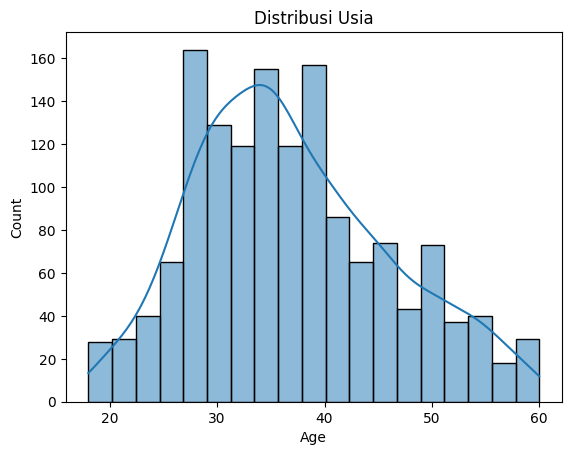

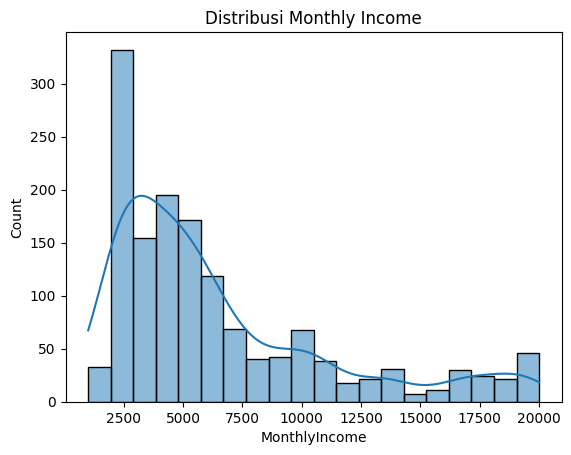

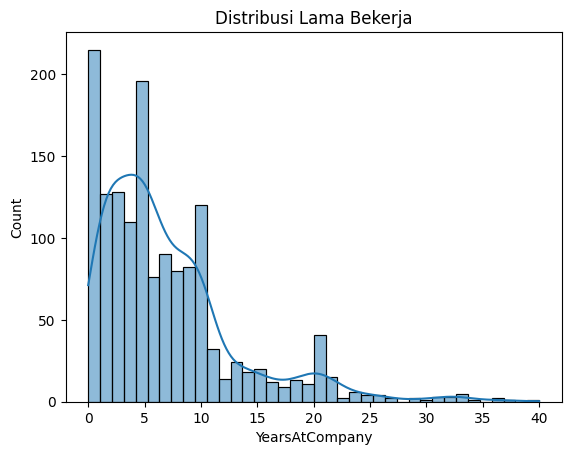

In [7]:
sns.histplot(df['Age'], kde=True).set_title('Distribusi Usia')
plt.show()

sns.histplot(df['MonthlyIncome'], kde=True).set_title('Distribusi Monthly Income')
plt.show()

sns.histplot(df['YearsAtCompany'], kde=True).set_title('Distribusi Lama Bekerja')
plt.show()

Hubungan dengan Attrition (Bivariate)

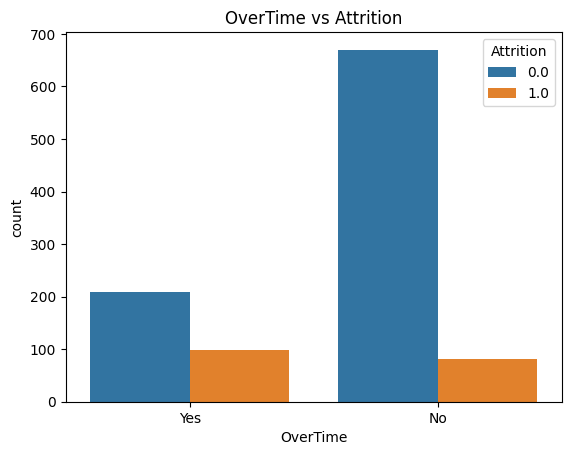

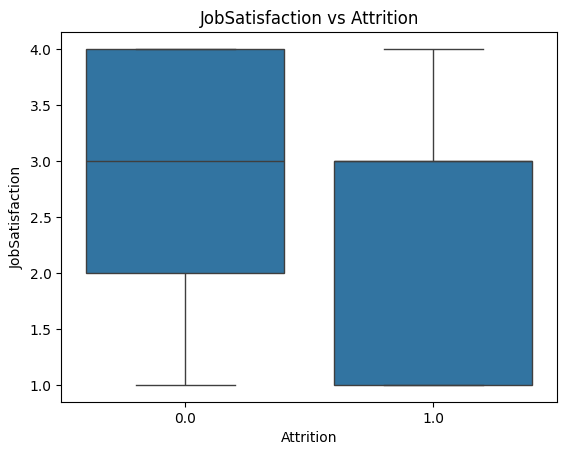

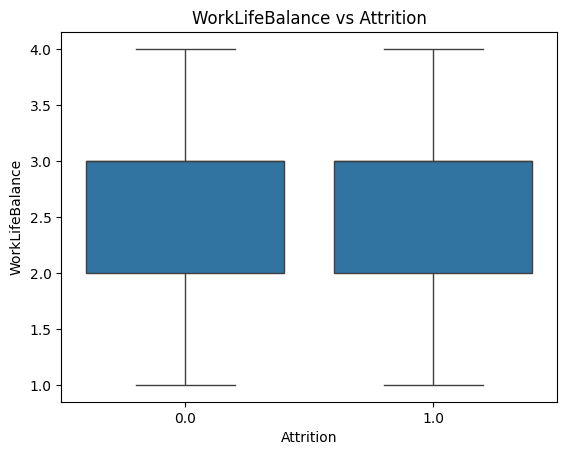

In [8]:
sns.countplot(data=df, x='OverTime', hue='Attrition').set_title('OverTime vs Attrition')
plt.show()

sns.boxplot(data=df, x='Attrition', y='JobSatisfaction').set_title('JobSatisfaction vs Attrition')
plt.show()

sns.boxplot(data=df, x='Attrition', y='WorkLifeBalance').set_title('WorkLifeBalance vs Attrition')
plt.show()

Korelasi Fitur Numerik

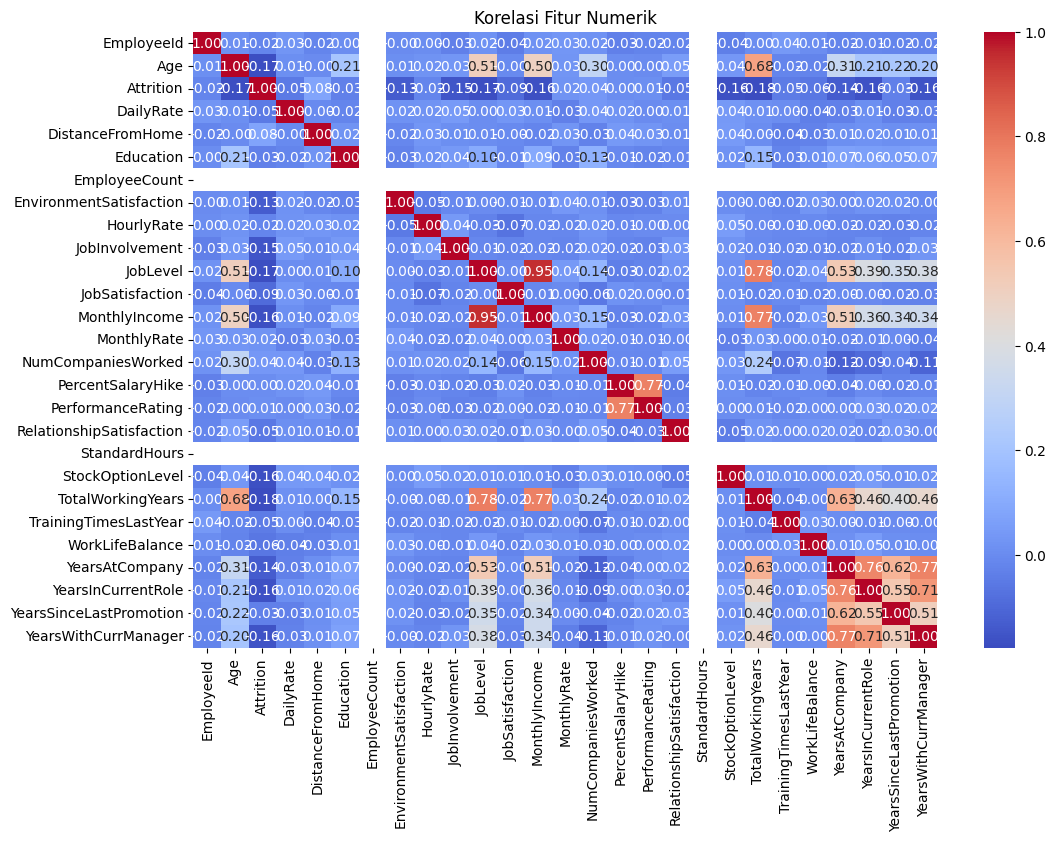

In [9]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.show()

Kategorikal Lain vs Attrition

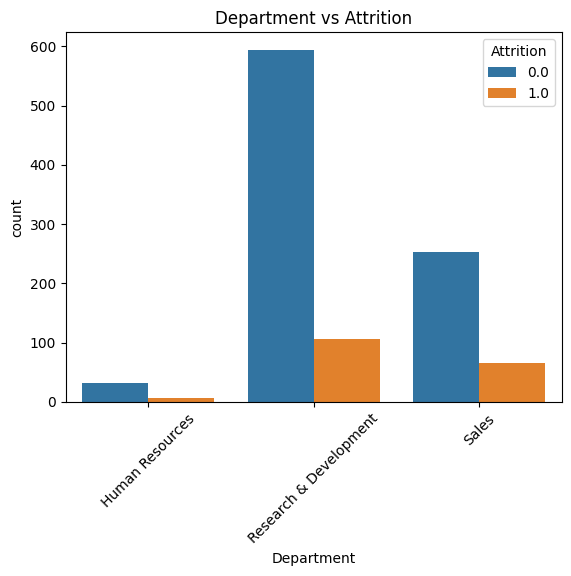

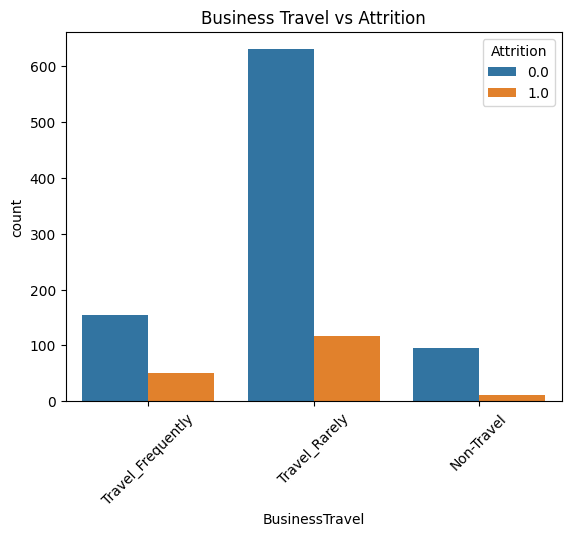

In [10]:
sns.countplot(data=df, x='Department', hue='Attrition').set_title('Department vs Attrition')
plt.xticks(rotation=45)
plt.show()

sns.countplot(data=df, x='BusinessTravel', hue='Attrition').set_title('Business Travel vs Attrition')
plt.xticks(rotation=45)
plt.show()

# **Data Preparation / Preprocessing**

Filter rows with non-null Attrition

In [ ]:
df = df[df['Attrition'].notna()].copy()
df['Attrition'] = df['Attrition'].astype(int)  # 1 = resign, 0 = stay

Pisahkan target dan fitur

In [ ]:
X = df.drop(columns=['EmployeeId', 'Attrition'])
y = df['Attrition']

Identifikasi fitur numerik dan kategorikal


In [ ]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

Pipeline numerik

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

Pipeline kategorikal

In [ ]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

Gabungkan semua preprocessing


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

Split train/test


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

Transformasi data

In [ ]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

Tampilkan hasil akhir


In [ ]:
# Tampilkan hasil akhir
print(f"Bentuk akhir X_train: {X_train_processed.shape}")
print(f"Bentuk akhir X_test: {X_test_processed.shape}")

Bentuk akhir X_train: (846, 54)
Bentuk akhir X_test: (212, 54)


# **Modeling and Evaluation**

In [ ]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_processed, y_train)
y_pred_rf = rf_model.predict(X_test_processed)

print("\n=== Random Forest ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


=== Random Forest ===
Accuracy: 0.8490566037735849
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       176
           1       0.83      0.14      0.24        36

    accuracy                           0.85       212
   macro avg       0.84      0.57      0.58       212
weighted avg       0.85      0.85      0.80       212

Confusion Matrix:
 [[175   1]
 [ 31   5]]


Confusion matrix untuk Random Forest

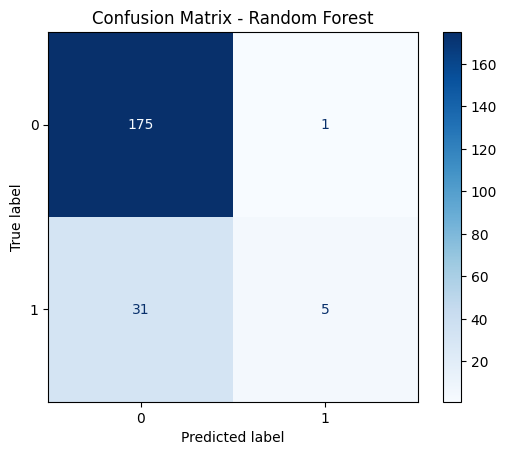

In [ ]:
cm = confusion_matrix(y_test, y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# **Feature Importance (Opsional)**

Dapatkan nama fitur setelah transformasi

In [ ]:
onehot = preprocessor.named_transformers_['cat']['onehot']
onehot_features = onehot.get_feature_names_out(categorical_features)
all_features = numeric_features + list(onehot_features)

Ambil feature importance dari Random Forest

In [ ]:
importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': all_features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

Tampilkan 10 fitur teratas

In [ ]:
feature_importance_df.head(10)

,Feature,Importance
10,MonthlyIncome,0.065187
0,Age,0.058660
1,DailyRate,0.053522
18,TotalWorkingYears,0.050928
11,MonthlyRate,0.044710
2,DistanceFromHome,0.041664
6,HourlyRate,0.040468
53,OverTime_Yes,0.037399
21,YearsAtCompany,0.034961
12,NumCompaniesWorked,0.032734


Visualisasi 10 fitur teratas


<ipython-input-21-3065461232>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance_df.head(top_n), x='Importance', y='Feature', palette='viridis')


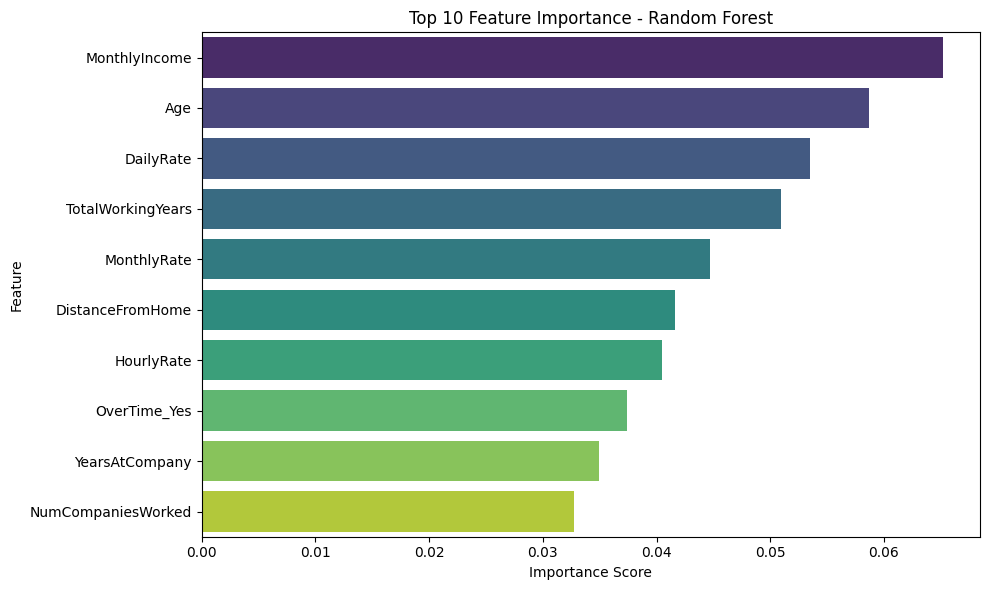

In [ ]:
top_n = 10
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance_df.head(top_n), x='Importance', y='Feature', palette='viridis')
plt.title(f'Top {top_n} Feature Importance - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## **Export**

Export prediksi + actual ke CSV

In [ ]:
output_df = X_test.copy()
output_df['Actual_Attrition'] = y_test.values
output_df['Predicted_Attrition'] = y_pred_rf
output_df.to_csv('turnover_predictions.csv', index=False)

Download


In [ ]:
from google.colab import files
files.download('turnover_predictions.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
pip install -r requirements.txt

In [ ]:
pip freeze > requirements.txt